In [2]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc
np.set_printoptions(threshold=np.inf)
import transmon as pt

In [3]:
N = 10
Ec = 0.25
Ej = 0.25 * 70
ng= 0.5
T_max = 300
T1 = 100
T2 = 350
Points=10000
P0=0.99
R0 = 100 * np.pi

In [1]:
def EJ_tanh_pulse(t, P0, R0, T):
    return (1-P0*(1+np.tanh(-R0+(t/T)*2*R0))/2.0)

def EJ_double_pulse(t, P0, R0, T1, T2):
    return EJ_tanh_pulse(t, P0, R0, T1) + (EJ_tanh_pulse(t - T2, -P0, R0, T1) - 1)

def H_cavity(N, wr, eigenbasis):
    return eigenbasis * Qobj(sc.hbar * wr * create(2*N + 1) * destroy(2*N +1)) * eigenbasis.inv()

def H_int(N, g, eigenbasis):
    m = sc.hbar * g * (tensor(sigmap(),destroy(2*N + 1)) + tensor(sigmam(), create(2*N + 1)))

    return eigenbasis * Qobj(m) * eigenbasis.inv()

def Hc(Ec, N, ng):
    """
    Reutrn the charging term of the charge qubit hamiltonian as a Qobj instance

    CHARGE BASIS
    """
    m = np.diag(4 * Ec * (np.arange(-N,N+1)-ng)**2)
    
    return Qobj(m)
def Hj(Ej, N):
    """
    Reutrn the Josephson term of the charge qubit hamiltonian as a Qobj instance

    CHARGE BASIS
    """

    m = 0.5 * Ej * (np.diag(-np.ones(2*N), 1) +  np.diag(-np.ones(2*N), -1))
    
    return Qobj(m)
def Hd_coeff(t,args):
    """
    CHARGE BASIS
    """
    Percentage=args['Percentage']
    Range=args['Range']
    T1=args['T1']
    T2=args['T2']
    return EJ_double_pulse(t, Percentage, Range, T1, T2)

def hamiltonian(Ec, Ej, N, ng):
    m = np.diag(4 * Ec * (np.arange(-N,N+1)-ng)**2) + 0.5 * Ej * (np.diag(-np.ones(2*N), 1) + np.diag(-np.ones(2*N), -1))
    return Qobj(m)



In [24]:
ng_vec = np.linspace(-1, 1, 200) # ????

t = np.linspace(0, T_max, Points)

# Calculate the eigenstates and eigenenergies of the original Hamiltonian
energies = np.array([hamiltonian(Ec, Ej, N, ng).eigenenergies() for ng in ng_vec])
evals, ekets = hamiltonian(Ec, Ej, N, ng).eigenstates()

# Decompose the Hamiltonian into the charge part, Josephson part and the time-dependent part
Htot = [Hc(Ec,N,ng), [Hj(Ej,N), Hd_coeff]]

# set initial state as the ground state of the time independent hamiltonian
psi0=ekets[0]

# calculate the eigenstates of the time independent hamiltonian using the new Josephson energy determined by the EJ pulsing at time T
evalsf, eketsf = hamiltonian(Ec, Ej*EJ_double_pulse(T_max, P0, R0, T1, T2), N, ng).eigenstates()

# solve the Schrodinger equation using the time dependent Hamiltonian and the initial state to model the evolution of the state adiabatically or instantaneously (dependent on the pulse slope) 
output = mesolve(Htot, psi0, t, args={'Percentage': P0, 'Range': R0,'T1':T1, 'T2':T2})

Ovrlp=np.zeros(Points) # shows the time evolution of the state

for n in range(0,Points):
    # overlap of the output to the initial state
    print(output.states[0])

Quantum object: dims = [[21], [1]], shape = (21, 1), type = ket
Qobj data =
[[4.25271970e-08]
 [6.06830893e-07]
 [7.22944803e-06]
 [7.11554573e-05]
 [5.68974216e-04]
 [3.62593322e-03]
 [1.80189573e-02]
 [6.81530945e-02]
 [1.91159428e-01]
 [3.87480825e-01]
 [5.55278021e-01]
 [5.55278021e-01]
 [3.87480825e-01]
 [1.91159428e-01]
 [6.81530945e-02]
 [1.80189573e-02]
 [3.62593322e-03]
 [5.68974209e-04]
 [7.11554113e-05]
 [7.22908281e-06]
 [6.03251612e-07]]
Quantum object: dims = [[21], [1]], shape = (21, 1), type = ket
Qobj data =
[[4.25271970e-08]
 [6.06830893e-07]
 [7.22944803e-06]
 [7.11554573e-05]
 [5.68974216e-04]
 [3.62593322e-03]
 [1.80189573e-02]
 [6.81530945e-02]
 [1.91159428e-01]
 [3.87480825e-01]
 [5.55278021e-01]
 [5.55278021e-01]
 [3.87480825e-01]
 [1.91159428e-01]
 [6.81530945e-02]
 [1.80189573e-02]
 [3.62593322e-03]
 [5.68974209e-04]
 [7.11554113e-05]
 [7.22908281e-06]
 [6.03251612e-07]]
Quantum object: dims = [[21], [1]], shape = (21, 1), type = ket
Qobj data =
[[4.25271970e-

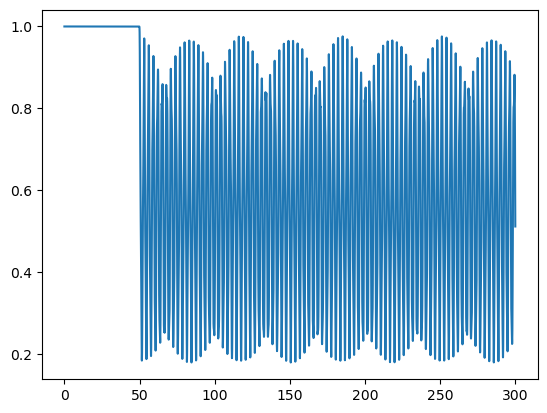

In [ ]:
plt.plot(t, Ovrlp)

In [23]:
tensor(sigmap(), create(3))

Quantum object: dims = [[2, 3], [2, 3]], shape = (6, 6), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.41421356 0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]